In [2]:
# Run some setup code for this notebook.
import matplotlib.pyplot as plt
import numpy as np


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 10) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


In [3]:
import pandas as pd
df = pd.read_csv('./data/mnist.csv') 
data = df.values
X = data[:, 1:]
y = data[:, 0]

print(f"{X.shape = }, {y.shape = }")

X.shape = (1000, 784), y.shape = (1000,)


In [5]:
# 实现pca算法并与对比sklearn
def pca(X, num_components):
    # 1. 标准化数据
    #print(f"{np.mean(X, axis=0).shape = }")
    X_standardized = np.zeros(X.shape)
    for i in range(X.shape[1]):
        if np.std(X[:, i]) == 0:
            X_standardized[:, i] = 0
        else:
            X_standardized[:, i] = (X[:, i] - np.mean(X[:, i])) / np.std(X[:, i])
    #X_standardized = X
    
    # 2. 计算协方差矩阵
    covariance_matrix = np.cov(X_standardized, rowvar=False)

    # 3. 计算协方差矩阵的特征值和特征向量
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # 4. 对特征值排序，并选取前num_components个特征向量
    #print(np.argsort(eigenvalues))
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]
    eigenvectors = eigenvectors[:, :num_components]
    #转换每个特征向量的符号，使得特征向量的第一个元素为正
    for i in range(eigenvectors.shape[1]):
        if eigenvectors[0, i] < 0:
            eigenvectors[:, i] = -eigenvectors[:, i]

    # 5. 转换数据
    X_reduced = np.dot(X_standardized, eigenvectors)




    return X_reduced
X_reduced = pca(X, 2)


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# 假设 X 是你的特征矩阵


# 首先标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_reduced_my_pca = pca(X, 2)
X_reduced_sklearn_pca = PCA(n_components=2).fit_transform(X_scaled)
# 计算两个降维结果之间的误差，欧式距离除以矩阵范数
#print(X_reduced_my_pca)
#print(X_reduced_sklearn_pca)
# 由于存在正负号的问题，所以需要取绝对值

error = np.linalg.norm(np.abs(X_reduced_my_pca) -np.abs(X_reduced_sklearn_pca) ) / np.linalg.norm(X_reduced_sklearn_pca)
print(f"error = { error}")


error = 6.201489732936502e-05


c:\ProgramData\anaconda3\Lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


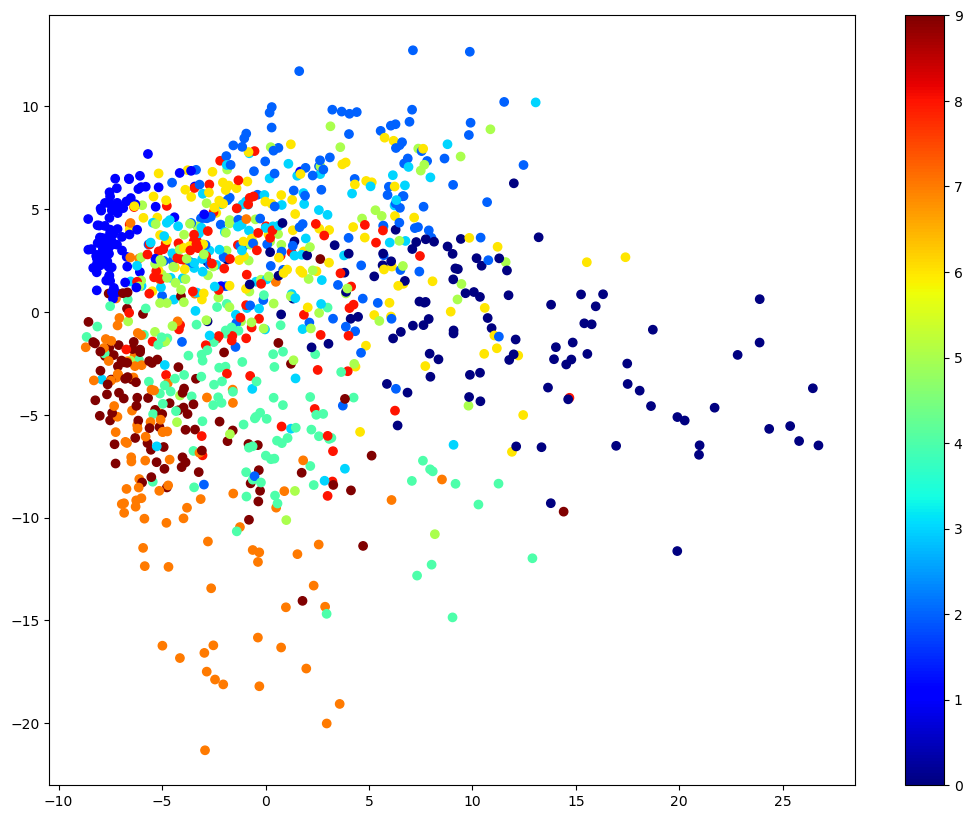

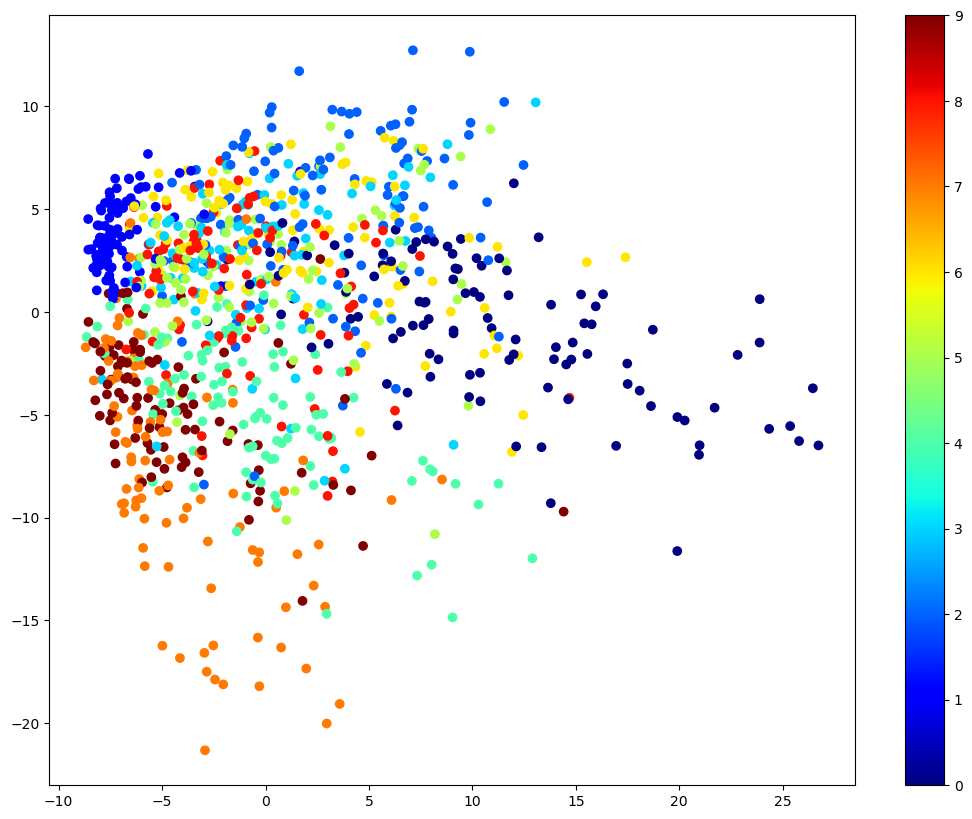

In [10]:
plt.scatter(X_reduced_my_pca[:, 0], X_reduced_my_pca[:, 1], c=y, cmap="jet")
plt.colorbar()
plt.show()
plt.scatter(X_reduced_sklearn_pca[:, 0], -X_reduced_sklearn_pca[:, 1], c=y, cmap="jet")
plt.colorbar()
plt.show()

In [12]:
# numpy 实现流形学习算法MDS
X_reduced = None
def mds(X, num_components=2):
    # 计算距离矩阵
    diff = X[:, np.newaxis, :] - X[np.newaxis, :, :]
    distance_matrix = np.sqrt(np.sum(diff**2, axis=-1))

    # 计算距离平方的平均值
    mean_dist_squared = np.mean(distance_matrix**2)
    mean_dist_i_squared = np.mean(distance_matrix**2, axis=1, keepdims=True)
    mean_dist_j_squared = np.mean(distance_matrix**2, axis=0, keepdims=True)

    # 计算双中心距离矩阵（B矩阵）
    B = -0.5 * (distance_matrix**2 - mean_dist_i_squared - mean_dist_j_squared + mean_dist_squared)

    # 计算特征值和特征向量
    eigenvalues, eigenvectors = np.linalg.eigh(B)

    # 对特征值排序并选择最大的num_components个
    sorted_indices = np.argsort(eigenvalues)[::-1]
    selected_eigenvalues = eigenvalues[sorted_indices][:num_components]
    selected_eigenvectors = eigenvectors[:, sorted_indices][:, :num_components]

    # 构造低维嵌入
    X_mds = selected_eigenvectors * np.sqrt(np.abs(selected_eigenvalues))

    return X_mds
X_reduced_my_mds = mds(X, 2)

In [8]:
X_3d = mds(X, 3)

In [16]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
#X_reduced = PCA(n_components=2).fit_transform(X)
X_reduced_mds = MDS(n_components=2).fit_transform(X)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


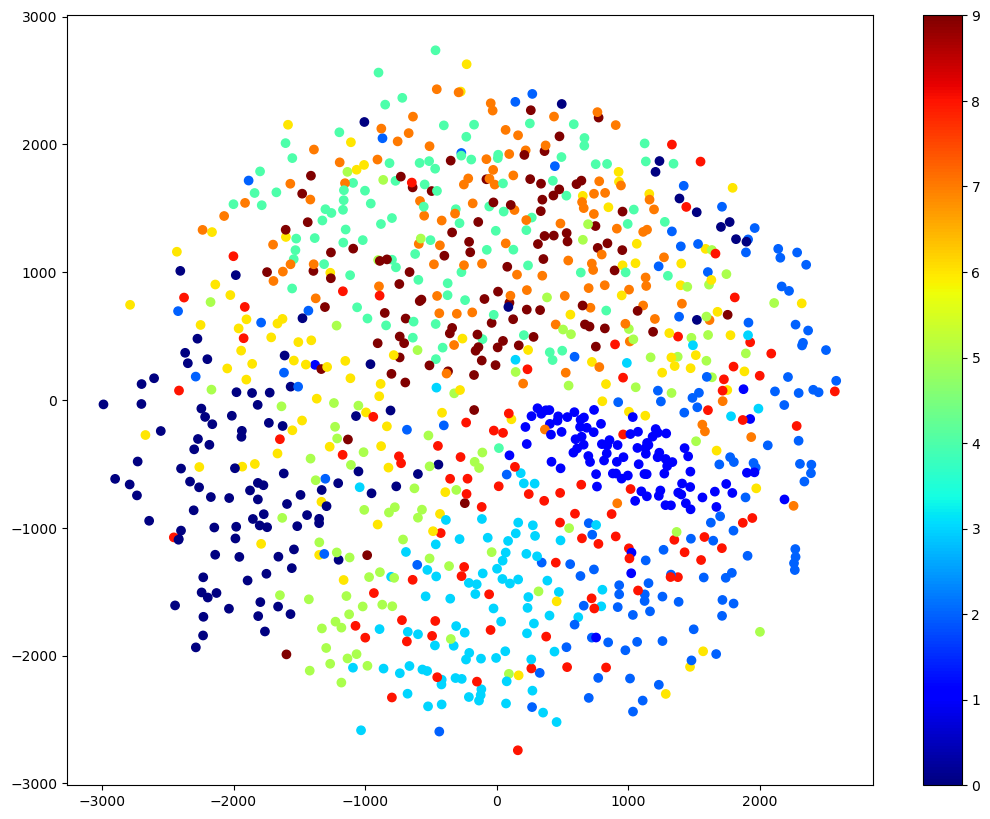

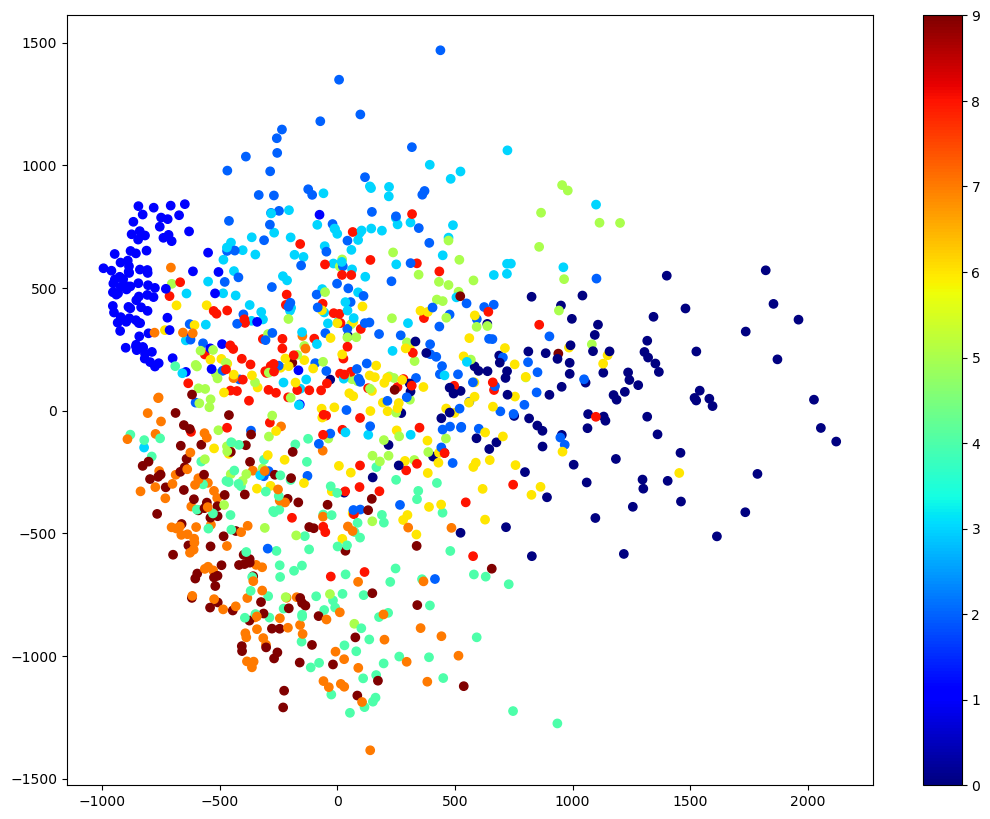

In [17]:
# 可视化降维结果
plt.scatter(X_reduced_mds[:, 0], X_reduced_mds[:, 1], c=y, cmap="jet")
plt.colorbar()
plt.show()
# 可视化降维结果
plt.scatter(-X_reduced_my_mds[:, 0], -X_reduced_my_mds[:, 1], c=y, cmap="jet")
plt.colorbar()
plt.show()

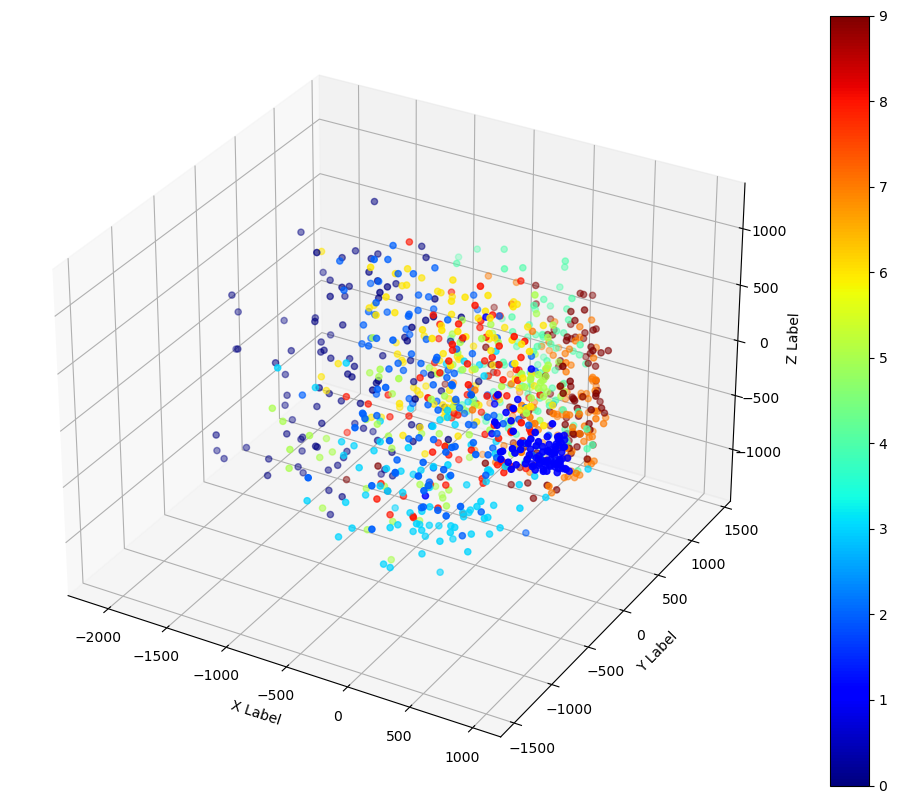

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y, cmap="jet")

# 添加颜色条
plt.colorbar(scatter)

# 设置标签
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 显示图形
plt.show()